In [16]:
import numpy as np
from matplotlib import pyplot as plt

In [76]:
class ES:
    def __init__(self, n, f, sigma, d):
        if sigma <= 0 or n <= 0:
            raise ValueError
        self.n = n
        self.f = f
        self.sigma = sigma
        self.d = d
        self.x = np.random.uniform(low=d[0], high=d[1], size=n)
        self.iteration = 0
        self.successful_mutations = 0
        self.unsuccessful_mutations = 0
        self.last_f_value = f(self.x)
        self.history = []
    
    def next_gen(self):
        mutated_x = self.x + self.sigma * np.random.normal(0, 1, size=self.n)
        mutated_x = np.clip(mutated_x, self.d[0], self.d[1])
        new_f_value = self.f(mutated_x)
        if new_f_value <= self.last_f_value:
            self.x = mutated_x
            self.history.append(new_f_value)
            self.last_f_value = new_f_value
            self.successful_mutations += 1
        else:
            self.history.append(self.last_f_value)
            self.unsuccessful_mutations + 1 
        self.iteration += 1
    
    def run(self, max_iter=10000):
        for i in range(max_iter):
            self.next_gen()
        print("Finished with best answer={} and success rate={}".format(self.x.round(3), self.successful_mutations/self.iteration))
    
    def plot_history(self, ax=None):
        ax = plt.gca() if ax is None else ax
        ax.plot(self.history)
        ax.set_xlabel('Iteration (Function Evaluation)')
        ax.set_ylabel('f(X)')
        ax.set_title('n={}, sigma={}, sr={}'.format(self.n, self.sigma, self.successful_mutations/self.iteration))
        if ax is None:
            plt.show()

In [77]:
def f1(x):
    return np.sum(x**2)

In [122]:
es = ES(2, f1, 0.05, (-100, 100))
es.run()

Finished with best answer=[-0.001 -0.   ] and success rate=0.2501


In [82]:
def f2(x):
    return (100*(x[1:]-x[:-1]**2)**2 + (x[:-1]-1)**2).sum()

In [78]:
n_space = [2, 5, 10, 50]
sigma_space = [0.2, 0.5, 1, 2]

Finished with best answer=[-0.    -0.001] and success rate=0.0595
Finished with best answer=[ 0.008 -0.001] and success rate=0.0233
Finished with best answer=[ 0.005 -0.007] and success rate=0.0114
Finished with best answer=[ 0.02  -0.009] and success rate=0.005
Finished with best answer=[-0.018 -0.029 -0.046  0.009 -0.007] and success rate=0.0826
Finished with best answer=[-0.079 -0.048 -0.05   0.069 -0.072] and success rate=0.0219
Finished with best answer=[-0.209  0.073 -0.142  0.038  0.006] and success rate=0.0131
Finished with best answer=[0.201 0.286 0.314 0.21  0.298] and success rate=0.0107
Finished with best answer=[ 0.     0.024  0.006 -0.056 -0.023  0.021  0.055 -0.081 -0.036 -0.117] and success rate=0.119
Finished with best answer=[ 0.057  0.164 -0.018 -0.087 -0.134 -0.127 -0.095 -0.414 -0.116  0.018] and success rate=0.0419
Finished with best answer=[-0.261  0.115 -0.907  0.162 -0.111  0.282 -0.324  0.131  0.122  0.258] and success rate=0.0203
Finished with best answer=[ 0

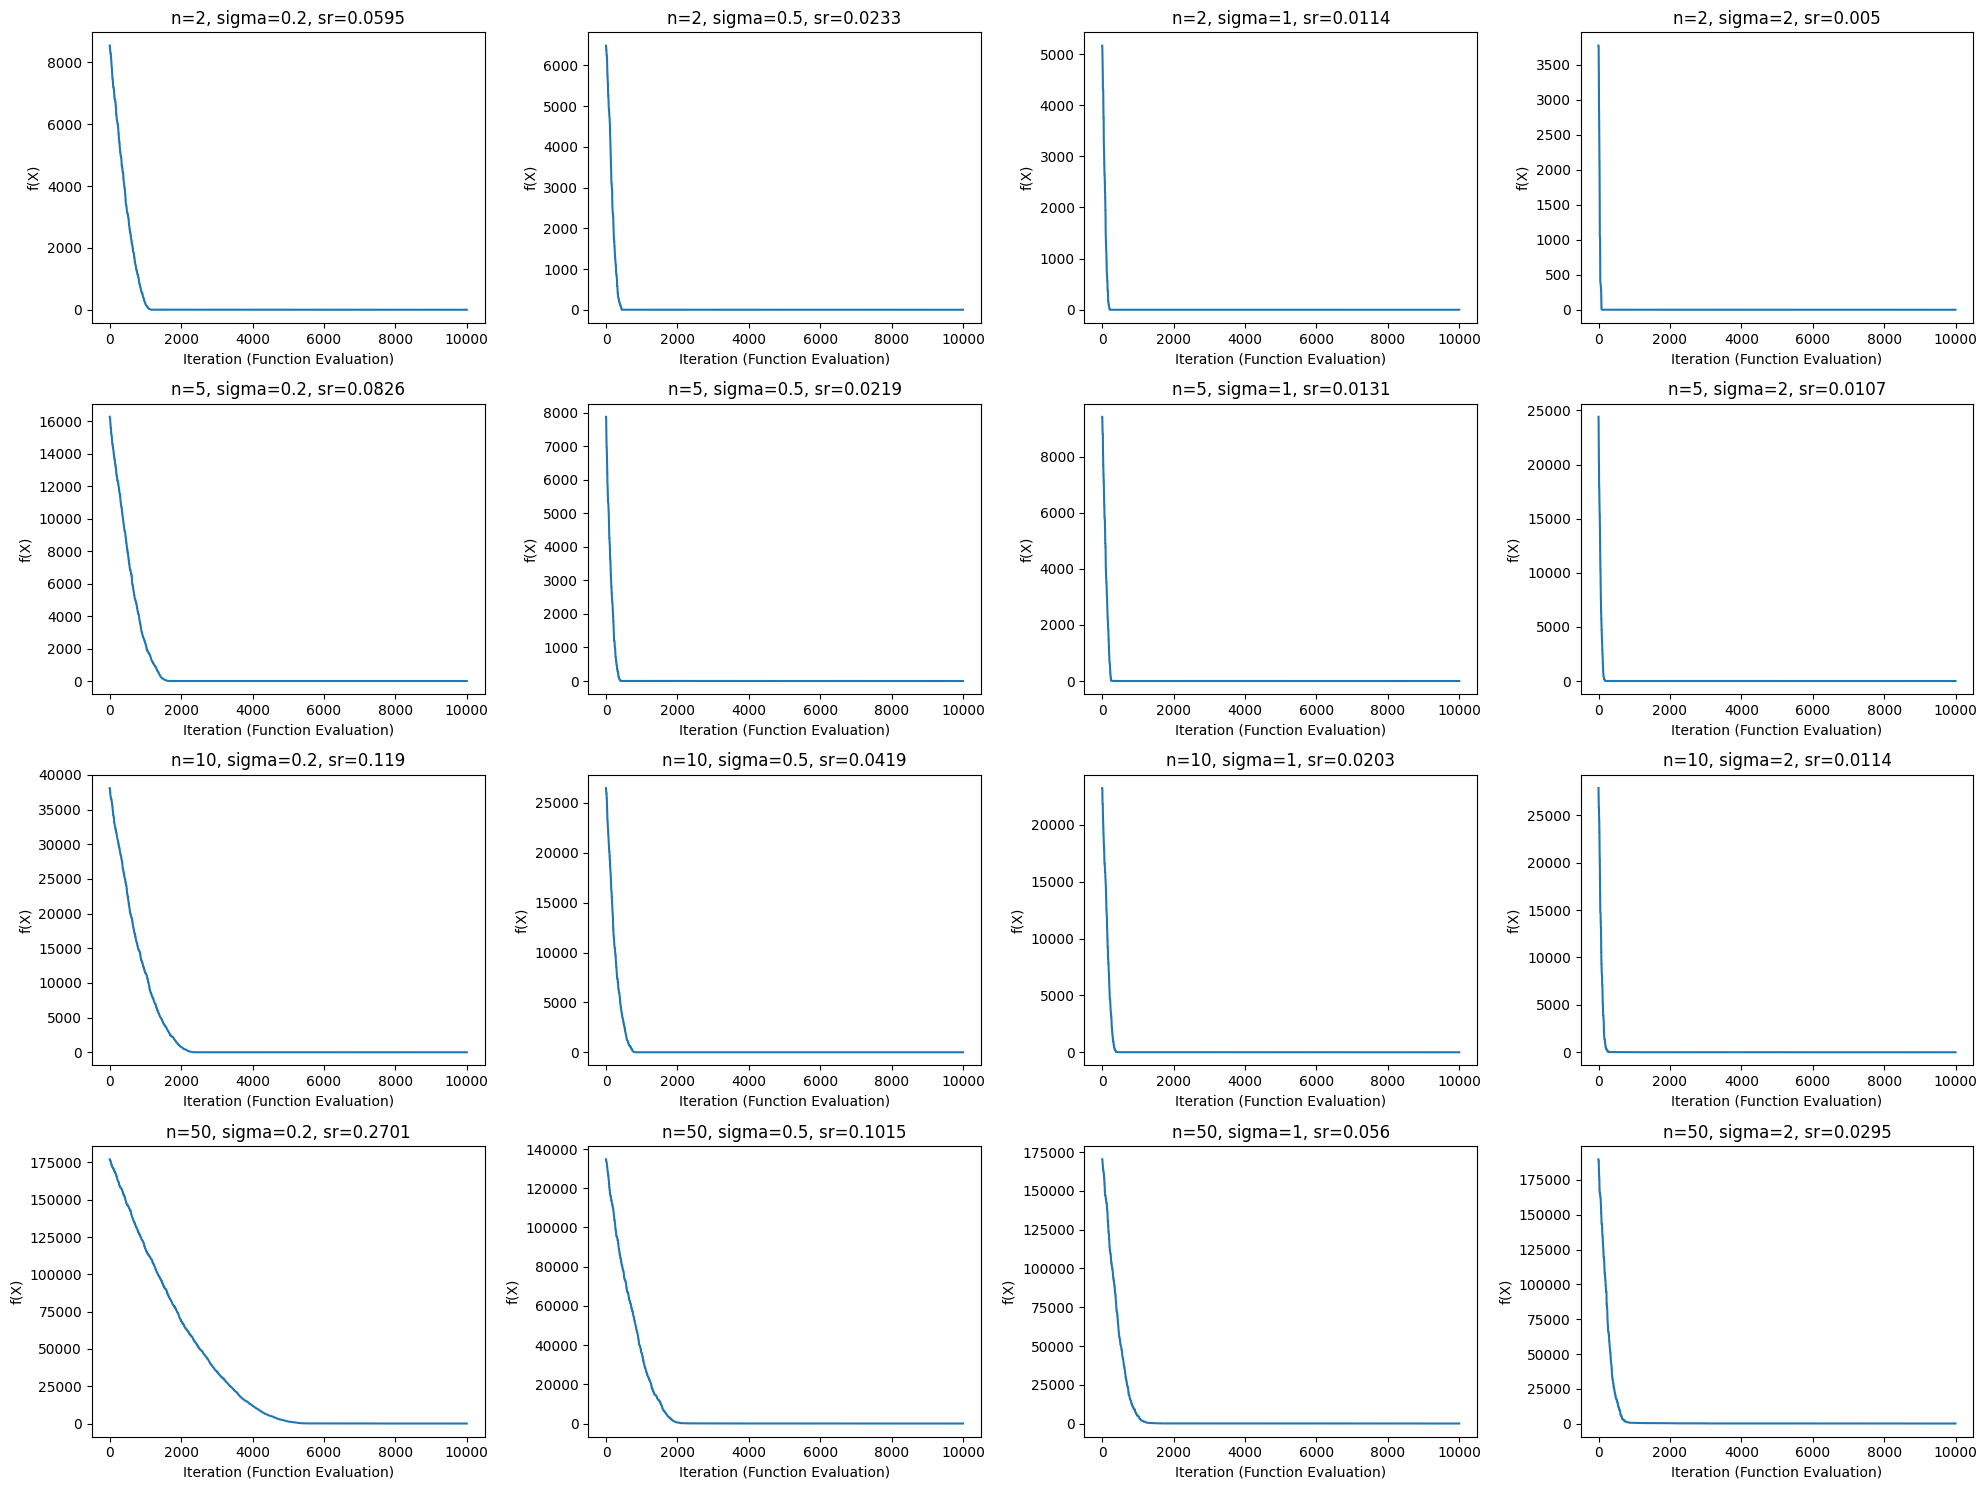

In [81]:
plt.figure(figsize=(20, 15))
for i, n in enumerate(n_space):
    for j, sigma in enumerate(sigma_space):
        es = ES(n, f1, sigma, (-100, 100))
        es.run()
        ax = plt.subplot(len(n_space), len(sigma_space), i*len(sigma_space)+j+1)
        es.plot_history(ax)
plt.tight_layout()
plt.show()

Finished with best answer=[-0.001 -0.001] and success rate=0.0149
Finished with best answer=[-0.004  0.005] and success rate=0.0073
Finished with best answer=[-0.003  0.001] and success rate=0.0041
Finished with best answer=[ 0.007 -0.022] and success rate=0.0031
Finished with best answer=[-0.005  0.036 -0.015 -0.03   0.034] and success rate=0.0334
Finished with best answer=[-0.054  0.107 -0.057 -0.02   0.021] and success rate=0.0082
Finished with best answer=[-0.075 -0.135  0.114 -0.288 -0.131] and success rate=0.005
Finished with best answer=[-0.157  0.338 -0.32   0.306  0.209] and success rate=0.0032
Finished with best answer=[-0.083 -0.004  0.086 -0.024 -0.137 -0.047  0.047 -0.087 -0.059  0.015] and success rate=0.0353
Finished with best answer=[-0.364 -0.102  0.084  0.113  0.017 -0.115 -0.083 -0.265  0.136 -0.023] and success rate=0.0193
Finished with best answer=[ 0.368 -0.041 -0.155  0.371  0.071  0.184  0.008  0.347  0.616 -0.29 ] and success rate=0.0088
Finished with best answ

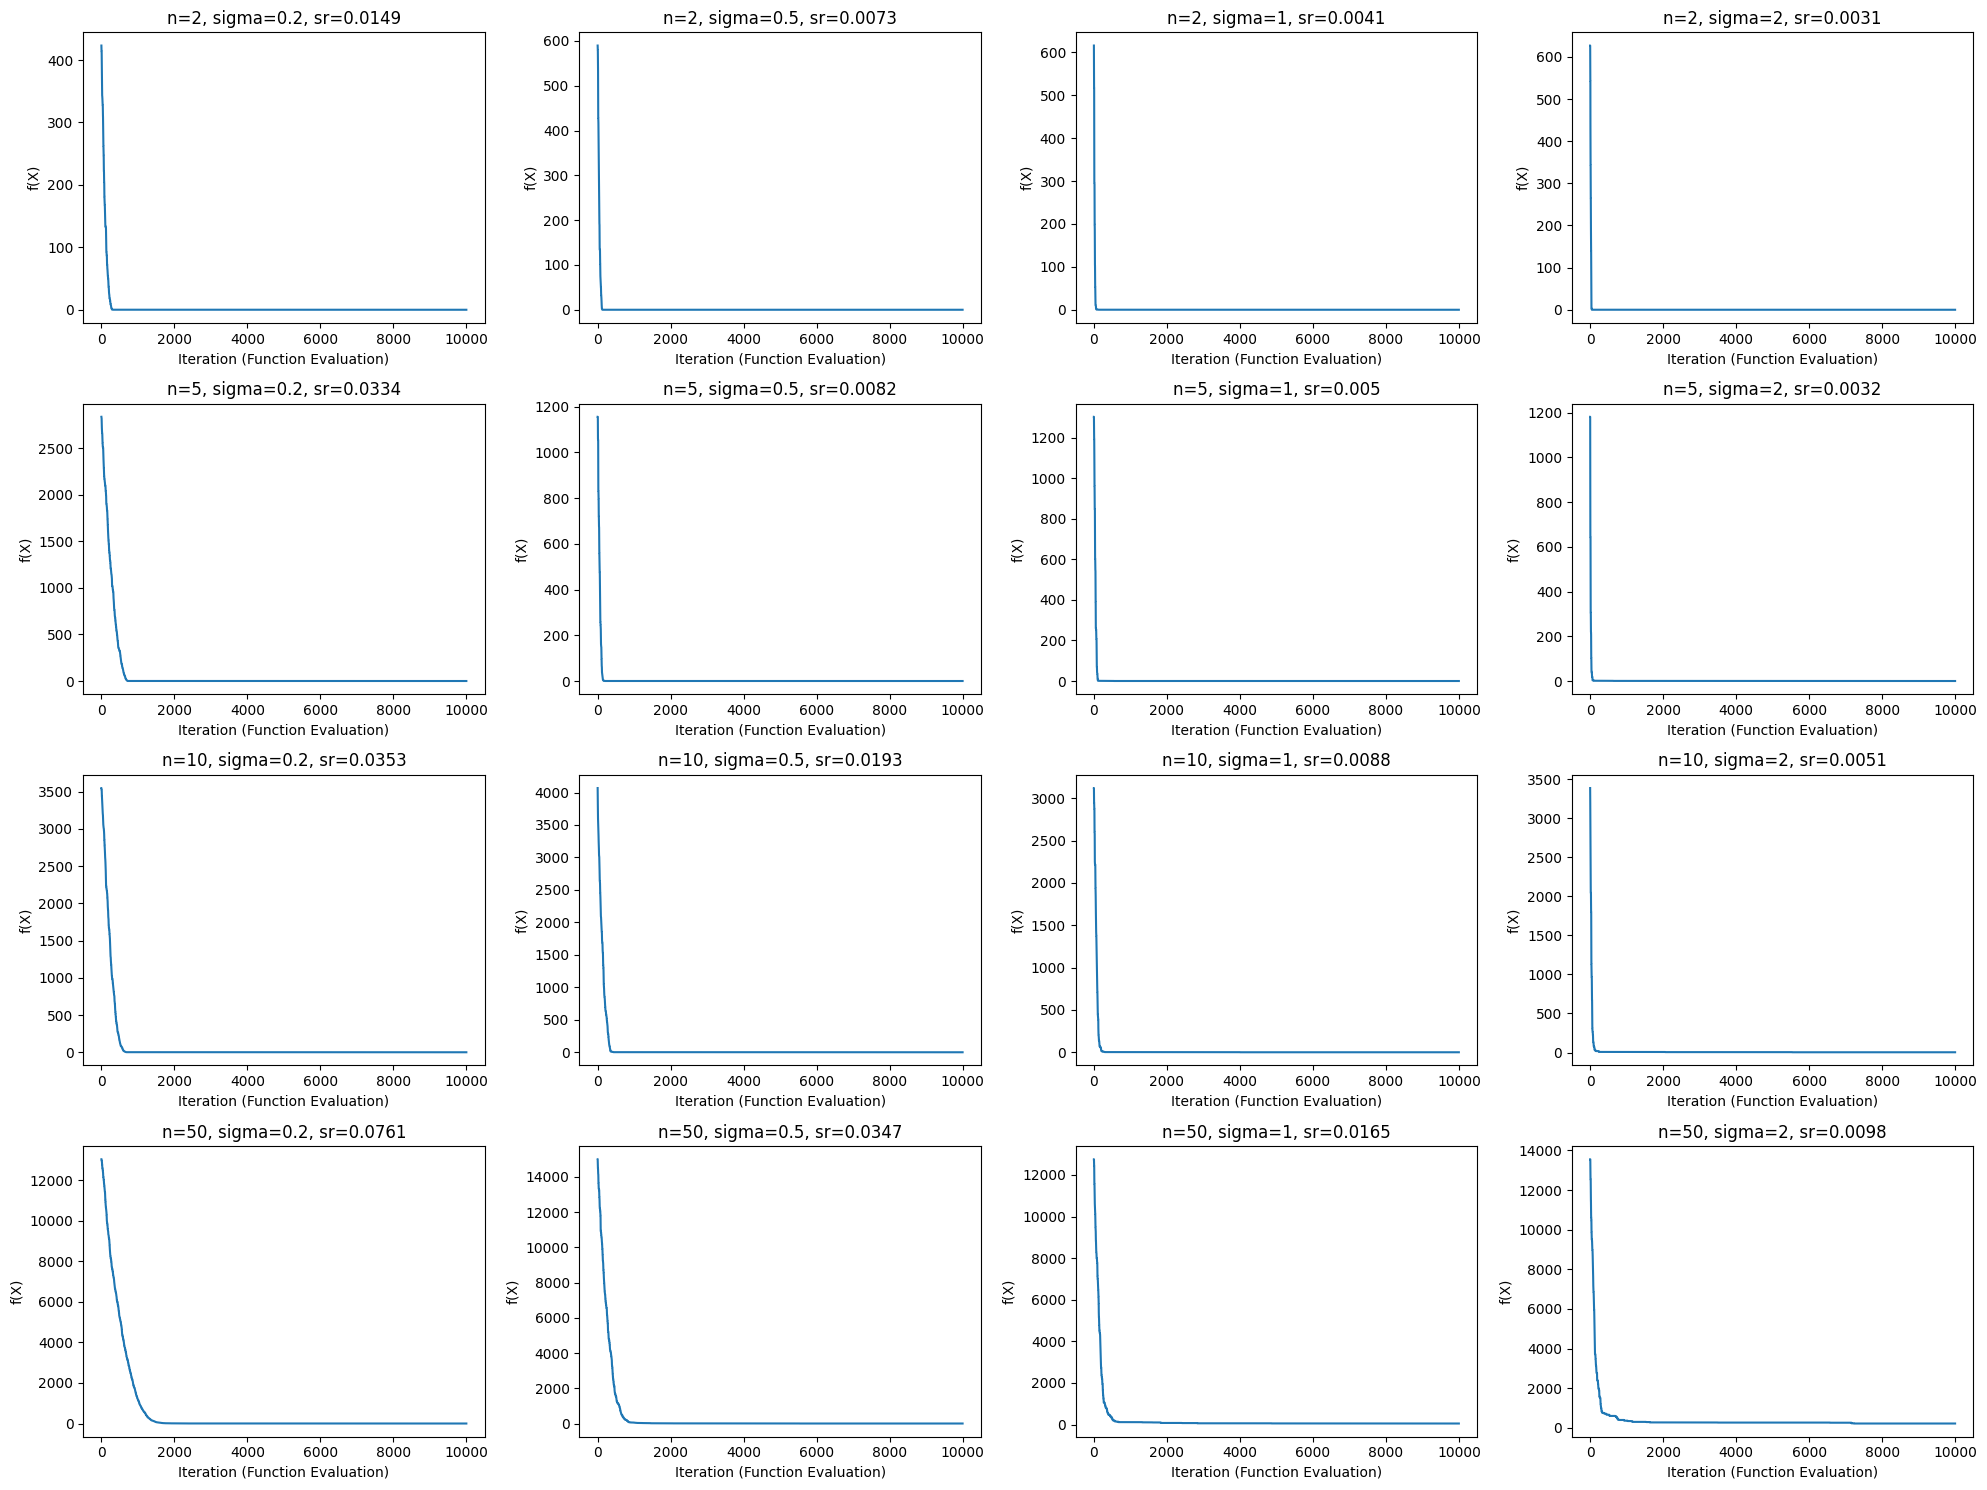

In [83]:
plt.figure(figsize=(20, 15))
for i, n in enumerate(n_space):
    for j, sigma in enumerate(sigma_space):
        es = ES(n, f1, sigma, (-30, 30))
        es.run()
        ax = plt.subplot(len(n_space), len(sigma_space), i*len(sigma_space)+j+1)
        es.plot_history(ax)
plt.tight_layout()
plt.show()